# Does Hosting Really Matter? 
## An Analysis of Home Advantage in FIFA World Cup History (1930–2022)

### 1. Introduction & Context
In football, it is commonly believed that playing at home provides a competitive edge. Factors such as crowd support, familiarity with local conditions, and reduced travel demands are often cited as advantages for the host nation.
However, in modern, highly professionalized football, does this advantage still hold?
This project explores whether hosting the FIFA World Cup has historically translated into measurable competitive success and whether that effect has diminished over time.


### 2. Hypothesis
**Hypothesis:** Hosting a FIFA World Cup significantly increases a country's probability of success. However, this advantage has decreased over time due to tournament expansion and football's globalization.

**Objective:** To analyze historical World Cup data in order to evaluate whether a measurable “home advantage” exists and how it has evolved across different eras.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gridspec
import warnings

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 12
theme = "mako"

df = pd.read_csv('FIFA - World Cup Summary.csv')
for col in ['HOST', 'CHAMPION', 'RUNNER UP', 'THIRD PLACE']:
    df[col] = df[col].str.strip()

def get_success_level(row):
    if row['HOST'] == row['CHAMPION']:
        return 3
    elif row['HOST'] == row['RUNNER UP']:
        return 2
    elif row['HOST'] == row['THIRD PLACE']:
        return 1
    else:
        return 0

df['host_success_level'] = df.apply(get_success_level, axis=1)

df.to_csv('FIFA_World_Cup_Analysis.csv', index=False)

df[['YEAR', 'HOST', 'host_success_level']].head()

,YEAR,HOST,host_success_level
0,1930,Uruguay,3
1,1934,Italy,3
2,1938,France,0
3,1950,Brazil,2
4,1954,Switzerland,0


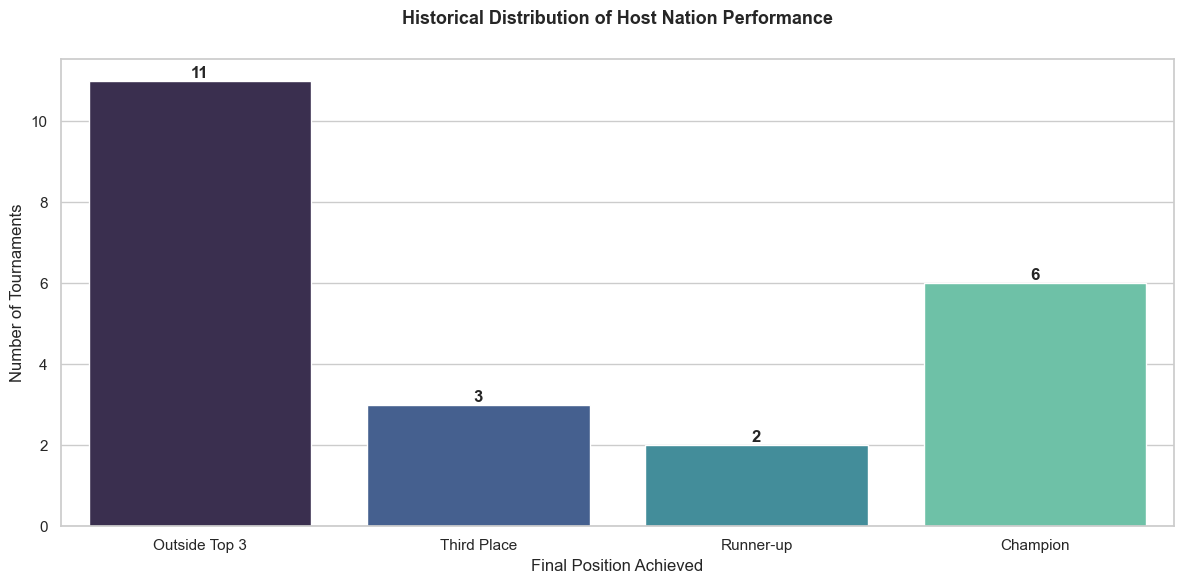

In [24]:
# Host Performance Distribution
plt.figure()
labels = ['Outside Top 3', 'Third Place', 'Runner-up', 'Champion']
counts = df['host_success_level'].value_counts().sort_index()

ax = sns.barplot(x=labels, y=counts.values, hue=labels, palette=theme, legend=False)

plt.title('Historical Distribution of Host Nation Performance', fontsize=13, pad=25)

plt.ylabel('Number of Tournaments')

plt.xlabel('Final Position Achieved', fontsize=12)

for p in ax.patches: ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()

plt.show()

### Interpretation

Historically, host nations have most frequently finished outside the top three. However, a non-negligible number of hosts have reached the final or won the tournament, suggesting that home advantage has historically played a relevant role.

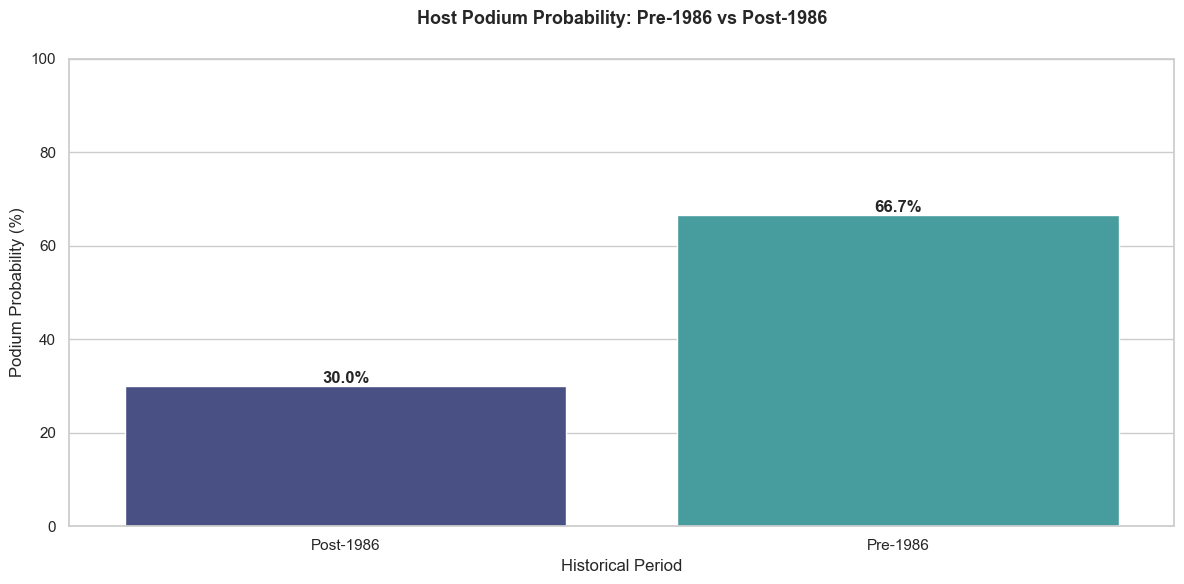

In [25]:
plt.figure()

# Divide tournaments into two eras (pre and post expansion)
df['Era'] = df['YEAR'].apply(lambda x: 'Pre-1986' if x < 1986 else 'Post-1986')

# Identify whether the host reached the podium (Top 3)
df['Reached_Podium'] = df['host_success_level'] > 0
success_by_era = df.groupby('Era')['Reached_Podium'].mean() * 100

ax = sns.barplot(x=success_by_era.index, y=success_by_era.values, hue=success_by_era.index, palette=theme, legend=False)

plt.title('Host Podium Probability: Pre-1986 vs Post-1986', fontsize=13, pad=25)

plt.ylabel('Podium Probability (%)')
plt.xlabel('Historical Period')
plt.ylim(0, 100)

for p in ax.patches:ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

### Interpretation

The data shows a clear decline in host podium probability after 1986. 
While host nations historically reached the top three positions at a significantly higher rate in early tournaments, this advantage appears to weaken in the modern era.
This structural shift may be linked to tournament expansion, increased competitive balance, and the globalization of football talent.

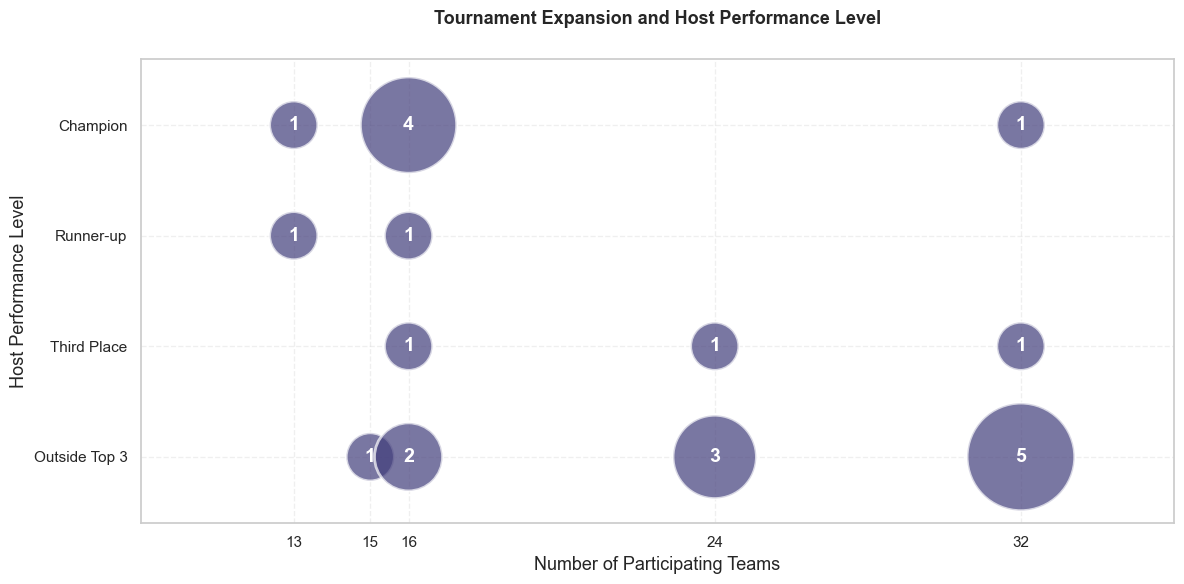

In [26]:
warnings.filterwarnings('ignore', category=RuntimeWarning)
counts_bubbles = df.groupby(['TEAMS', 'host_success_level']).size().reset_index(name='count')

plt.figure()
sns.set_style("whitegrid", {'axes.grid': True, 'grid.linestyle': '--'})

plt.scatter(data=counts_bubbles, x='TEAMS', y='host_success_level', s=counts_bubbles['count']*1200, color=sns.color_palette(theme)[1], alpha=0.7, edgecolors="white", linewidth=2, zorder=2)
for i in range(counts_bubbles.shape[0]): plt.text(counts_bubbles.TEAMS[i], counts_bubbles.host_success_level[i], str(counts_bubbles['count'][i]), va='center', ha='center', color='white', fontweight='bold', fontsize=14, zorder=3)

plt.title('Tournament Expansion and Host Performance Level', fontsize=13, pad=25)
plt.xlabel('Number of Participating Teams', fontsize=13)
plt.ylabel('Host Performance Level', fontsize=13)

plt.yticks([0, 1, 2, 3], ['Outside Top 3', 'Third Place', 'Runner-up', 'Champion'])
plt.ylim(-0.6, 3.6)

plt.xticks(sorted(df['TEAMS'].unique()))
plt.xlim(df['TEAMS'].min() - 4, df['TEAMS'].max() + 4)

plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

### Interpretation

The visualization suggests a structural relationship between tournament size and host performance.
In smaller tournaments (fewer participating teams), host nations more frequently reached advanced stages. However, as the number of teams increased, host success appears more dispersed and less dominant.
This supports the hypothesis that tournament expansion may have diluted the structural advantage historically enjoyed by host nations.

# Conclusions: The Myth and Reality of Home Advantage
After analyzing the historical World Cup data, the impact of hosting can be understood across three key dimensions: time, scale, and competitive hierarchy.

### 1. The Erosion of Home Advantage
Home advantage is no longer the decisive factor it once appeared to be. When dividing tournament history into two major eras, we observe a substantial decline in host effectiveness at reaching the podium:
- **Early Era (1930–1982):** **66.7%** of host nations reached the podium.
- **Modern Era (1986–2022):** Only **30.0%** of hosts achieved a top-three finish.
**Verdict:** The professionalization and globalization of football have significantly reduced the psychological and logistical benefits historically associated with hosting.

### 2. Overall Success Rates and Probabilities
Across 22 editions:
- **Hosts reaching the podium:** 11 out of 22 tournaments (**50% historical success rate**)  
- **Hosts winning the title:** 6 out of 22 tournaments (**27.3% championship rate**)  
**Insight:** Hosting roughly doubles the probability of success compared to a randomly selected team, yet it still fails to guarantee a championship in nearly 75% of cases.

### 3. Scale vs. Success
A negative relationship emerges between tournament size and host dominance.
As the World Cup expanded (from 13–16 teams to 32), the likelihood of host dominance declined. Increased competitive depth appears to dilute structural home advantage.
Greater scale → greater parity → reduced host impact.

### 4. The Hierarchy Factor
The analysis suggests that home advantage amplifies existing strength — it does not create it.
- **Historical Football Powers** (Argentina, Brazil, Italy, Germany, France, Uruguay, England, Spain): When hosting, they won **6 out of 12 times (50%)**.
- **Non-traditional Powers:**: When hosting, they won **0 out of 10 times (0%)**, though some achieved notable podium finishes (e.g., Chile 1962, South Korea 2002).
**Conclusion:** Home advantage acts as an accelerator, but only for nations already positioned within the global football elite.

---

## Final Insight
Home-field advantage in World Cups has shifted from a dominant statistical edge to a marginal competitive benefit.
In early, smaller tournaments, hosting functioned almost as a medal guarantee. In modern, highly competitive football, home advantage translates into ultimate success only when the host nation already belongs to the sport’s elite tier.

Hosting matters — but hierarchy matters more.

## Executive Dashboard Summary

The visual summary below consolidates historical performance, structural changes, and hierarchy effects into a single analytical view.

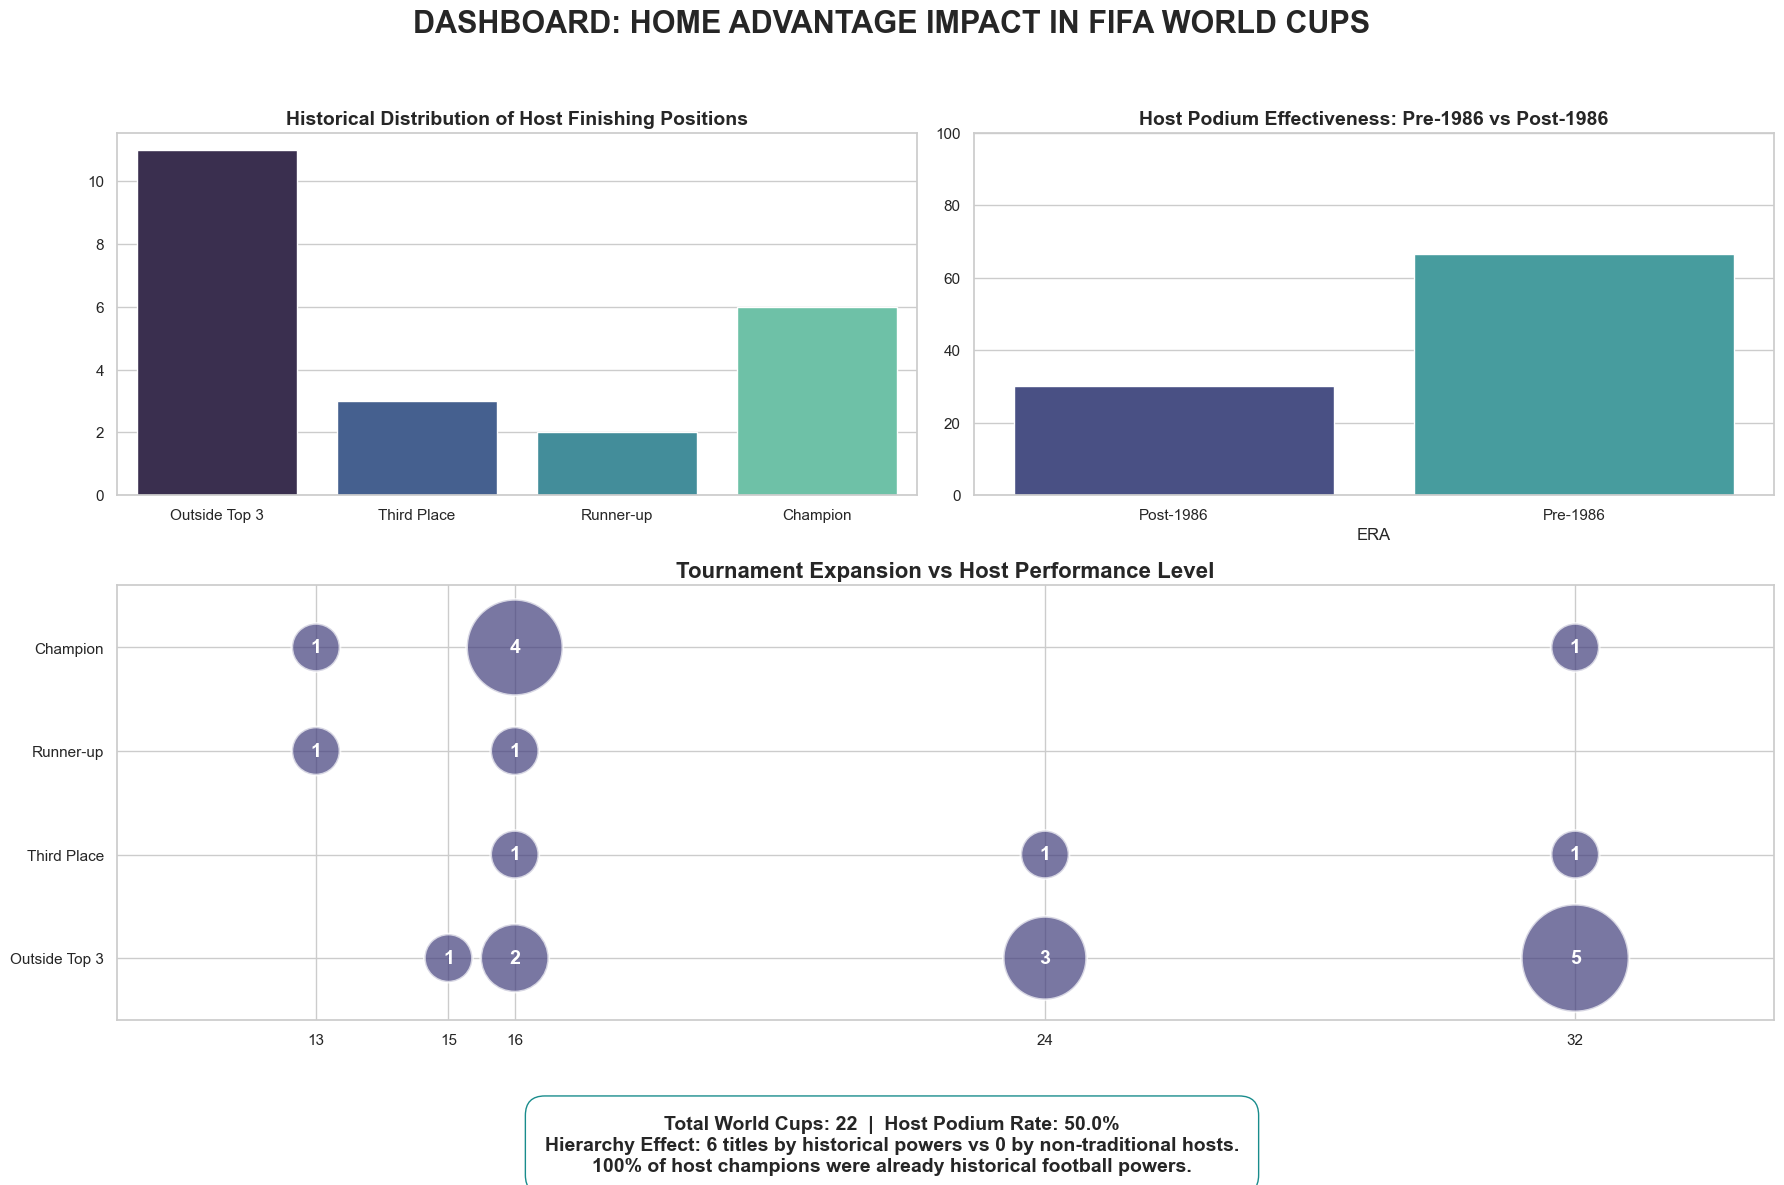

In [27]:
warnings.filterwarnings('ignore', category=RuntimeWarning)
sns.set_theme(style="whitegrid")
PALETTE = "mako"

df = pd.read_csv('FIFA - World Cup Summary.csv')
df.columns = df.columns.str.strip()
for col in ['HOST', 'CHAMPION', 'RUNNER UP', 'THIRD PLACE']:df[col] = df[col].str.strip()

def get_success_level(row):
    if row['HOST'] == row['CHAMPION']: return 3
    elif row['HOST'] == row['RUNNER UP']: return 2
    elif row['HOST'] == row['THIRD PLACE']: return 1
    else: return 0

df['host_success_level'] = df.apply(get_success_level, axis=1)
df['on_podium'] = df['host_success_level'] > 0
df['ERA'] = df['YEAR'].apply(lambda x: 'Pre-1986' if x < 1986 else 'Post-1986')

total_wcs = len(df)
campeones = len(df[df['host_success_level'] == 3])
podium_pct = df['on_podium'].mean() * 100
counts_bubbles = df.groupby(['TEAMS', 'host_success_level']).size().reset_index(name='count')

fig = plt.figure(figsize=(18, 12))
gs = gridspec.GridSpec(2, 2, figure=fig, height_ratios=[1, 1.2])
fig.suptitle('DASHBOARD: HOME ADVANTAGE IMPACT IN FIFA WORLD CUPS', fontsize=22, fontweight='bold', y=0.98)

# Chart 1: Historical Distribution
ax1 = fig.add_subplot(gs[0, 0])
labels = ['Outside Top 3', 'Third Place', 'Runner-up', 'Champion']
counts_map = df['host_success_level'].value_counts().reindex([0, 1, 2, 3], fill_value=0)
sns.barplot(x=labels, y=counts_map.values, hue=labels, palette=PALETTE, ax=ax1)
ax1.set_title('Historical Distribution of Host Finishing Positions', fontsize=14, fontweight='bold')
if ax1.get_legend(): ax1.get_legend().remove()

# Chart 2: Era Comparison
ax2 = fig.add_subplot(gs[0, 1])
success_by_era = df.groupby('ERA')['on_podium'].mean() * 100
sns.barplot(x=success_by_era.index, y=success_by_era.values, hue=success_by_era.index, palette=PALETTE, ax=ax2)
ax2.set_title('Host Podium Effectiveness: Pre-1986 vs Post-1986', fontsize=14, fontweight='bold')
ax2.set_ylim(0, 100)
if ax2.get_legend(): ax2.get_legend().remove()

# Chart 3: Expansion vs Performance
ax3 = fig.add_subplot(gs[1, :])

ax3.scatter(data=counts_bubbles, x='TEAMS', y='host_success_level', s=counts_bubbles['count']*1200, color=sns.color_palette(PALETTE)[1], alpha=0.7, edgecolors="white", linewidth=2, zorder=2)

for i in range(len(counts_bubbles)):ax3.text(counts_bubbles.TEAMS.iloc[i], counts_bubbles.host_success_level.iloc[i], str(counts_bubbles['count'].iloc[i]), va='center', ha='center', color='white', fontweight='bold', fontsize=14, zorder=3)

ax3.set_title('Tournament Expansion vs Host Performance Level', fontsize=16, fontweight='bold')
ax3.set_yticks([0, 1, 2, 3])
ax3.set_yticklabels(['Outside Top 3', 'Third Place', 'Runner-up', 'Champion'])
ax3.set_xticks(sorted(df['TEAMS'].unique()))
ax3.set_xlim(df['TEAMS'].min() - 3, df['TEAMS'].max() + 3)
ax3.set_ylim(-0.6, 3.6)

historical_powers = ['Argentina', 'Brazil', 'Italy', 'West Germany', 'Germany', 'France', 'Uruguay', 'England', 'Spain']
df['is_historical_power'] = df['HOST'].apply(lambda x: any(p in x for p in historical_powers))

wins_power  = df[df['is_historical_power'] & (df['host_success_level'] == 3)].shape[0]
wins_non_power  = df[~df['is_historical_power'] & (df['host_success_level'] == 3)].shape[0]

# KPI INFO BOX
summary_text = (f"Total World Cups: {total_wcs}  |  Host Podium Rate: {podium_pct:.1f}%\n"
                f"Hierarchy Effect: {wins_power} titles by historical powers vs {wins_non_power} by non-traditional hosts.\n"
                f"100% of host champions were already historical football powers.")

fig.text(0.5, 0.012, summary_text, ha='center', fontsize=14, fontweight='bold', bbox=dict(facecolor='white', alpha=0.9, edgecolor='teal', boxstyle='round,pad=1'))

plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.show()

### Analysis Limitations
It is important to acknowledge the constraints of this study for future iterations:
* **Level of Aggregation:** The dataset is tournament-level. It does not analyze match-by-match performance (e.g., goals scored/conceded, possession, or in-game metrics).
* **Team Quality Adjustment:** Historical FIFA rankings and the relative strength of the host nation prior to each tournament are not incorporated into the model.
* **Small Sample Size:** The analysis includes only 22 World Cup editions, which limits the ability to obtain highly robust statistical significance in certain comparisons.
* **Modern Performance Metrics:** Advanced data such as xG (Expected Goals), distance covered, environmental conditions, or physiological indicators are not included, which could better explain potential physical or tactical home advantages.